In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.10343191 0.03046871 0.0367001  ... 0.09486841 0.07619842 0.05609329]
 [0.05423109 0.01597526 0.01924248 ... 0.0497411  0.03995212 0.02941066]
 [0.10482841 0.03088009 0.03719561 ... 0.09614929 0.07722723 0.05685064]
 ...
 [0.20019638 0.05897335 0.07103444 ... 0.18362141 0.14748494 0.10857069]
 [0.2081952  0.06132962 0.07387261 ... 0.19095797 0.15337768 0.11290862]
 [0.35930728 0.10584384 0.12749076 ... 0.32955894 0.26470215 0.19485986]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.04275739  0.02007509 -0.02251165 ...  0.28956577  0.14215427
   0.23029647]
 [ 0.06542905  0.01705598 -0.05340281 ...  0.03746724  0.01065805
   0.02477004]
 [ 0.1580994  -0.0212822   0.04293035 ...  0.03178593  0.0038014
   0.3044599 ]
 ...
 [ 0.09887381  0.01972274 -0.02916834 ...  0.27704989  0.08276397
   0.22121208]
 [ 0.26038717  0.03552579  0.32708273 ...  0.23339978  0.14424
   0.03877392]
 [ 0.27134071  0.04160029  0.05214792 ...  0.10712021  0.26364339
   0.370639

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix,
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace")
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
Initializing latent factors using SVD.
[ 0.211162   -0.17158142 -0.00257191 -0.02149602  0.25509762 -0.00093341
 -0.03679658 -0.04405128 -0.00769414  0.0256753  -0.05421211  0.19731332
  0.28211581  0.26324982  0.02705093  0.09727189  0.33266959  0.25930739
 -0.25712256 -0.48117347 -0.06301011  0.11822283 -0.18384893  0.23262664
 -0.30914264  0.11977383 -0.21765331 -0.23373761  0.12605601 -0.00173111
 -0.12623008 -0.10015182  0.2198553   0.11007447  0.10996203  0.27805735
 -0.17686491 -0.10863913 -0.43963446  0.03048833 -0.08030794 -0.13384717
 -0.0173511   0.02210916 -0.06579261 -0.20295606 -0.17450458 -0.08254786
  0.00857092  0.10434663]
[-0.30166496  0.10506265  0.01182373  0.00894917 -0.21531533  0.00148826
 -0.07360038 -0.23030699 -0.04133591  0.12853868  0.18816188 -0.17012063
 -0.0731592   0.05781388 -0.07545668  0.29006583  0.10892655  0.24384545
  0.0123141   0.31015895  0.08857227 -0.04459798 -0.08298204 -0.19780397
 -0.0711503 

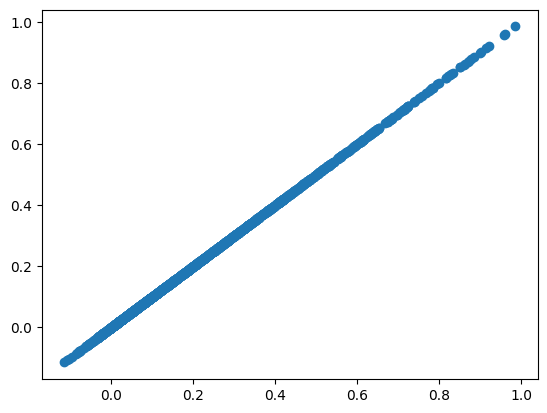

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

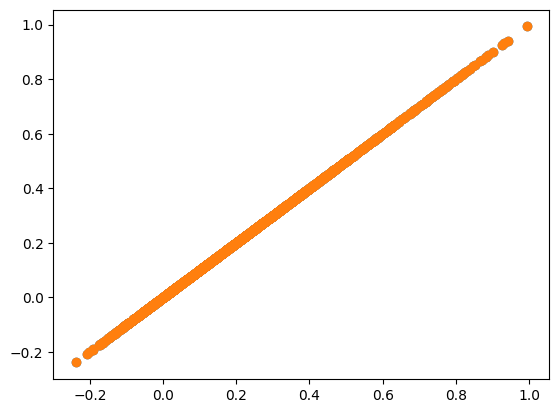

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[138.39257212, 138.39257212, 138.39257212, ..., 138.39257212,
        138.39257212, 138.39257212],
       [138.39257212, 138.39257212, 138.39257212, ..., 138.39257212,
        138.39257212, 138.39257212],
       [138.39257212, 138.39257212, 138.39257212, ..., 138.39257212,
        138.39257212, 138.39257212],
       ...,
       [138.39257212, 138.39257212, 138.39257212, ..., 138.39257212,
        138.39257212, 138.39257212],
       [138.39257212, 138.39257212, 138.39257212, ..., 138.39257212,
        138.39257212, 138.39257212],
       [138.39257212, 138.39257212, 138.39257212, ..., 138.39257212,
        138.39257212, 138.39257212]], shape=(50, 40))

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

point_Laplace


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:87: RuntimeWarning: invalid value encountered in multiply
  beta_frac = beta * np.exp( np.clip(stats.norm.logpdf(beta) - pnorm_diff, None, 700))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:105: RuntimeWarning: invalid value encountered in add
  upper_bd2 = (alpha ** 2 + alpha * beta + beta ** 2) / 3
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:86: RuntimeWarning: invalid value encountered in multiply
  alpha_frac = alpha * np.exp( np.clip(stats.norm.logpdf(alpha) - pnorm_diff, None, 700))


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
fhat , s_f  = compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
ebnm_obj = ebnm_point_laplace_solver(x  = fhat, 
                          s= s_f  
                         ) 
ebnm_obj

In [11]:
ebnm_obj.post_mean
 

array([ 0.17723686,  0.04530534,  0.06279042,  0.21972341,  0.2572584 ,
       -0.00055614,  0.23632812,  0.11628535,  0.14888267,  0.05769105,
        0.10240332,  0.15774653,  0.11451077,  0.23719778,  0.21211608,
        0.18389193,  0.18532066,  0.15056774,  0.11824455,  0.01742706,
        0.03982361,  0.13356111,  0.09954627,  0.09885549,  0.20583714,
        0.09595424,  0.18621395,  0.2523338 ,  0.25307936,  0.07495729,
        0.04602276,  0.0294752 ,  0.17985434,  0.24104804,  0.20949305,
        0.19664   ,  0.03563548,  0.17141579,  0.12983483,  0.11166508])

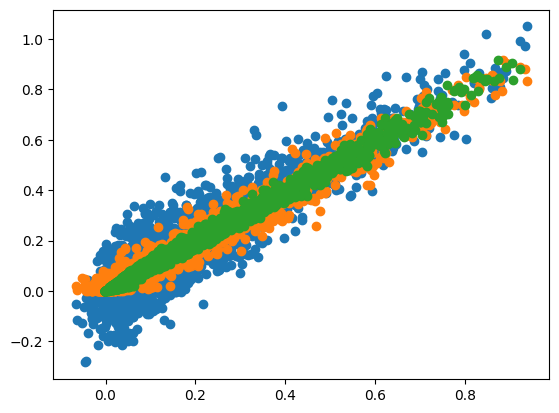

In [12]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


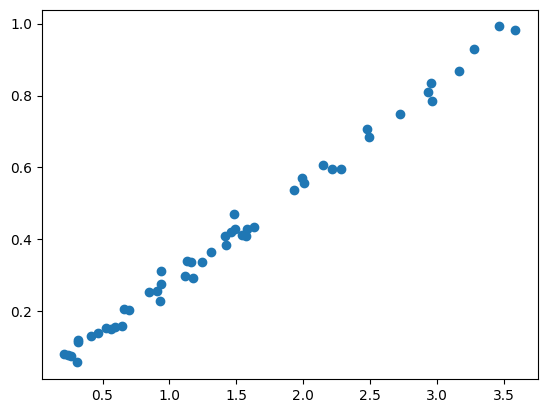

In [13]:
plt.scatter(mycebmf.L[:,0], u)

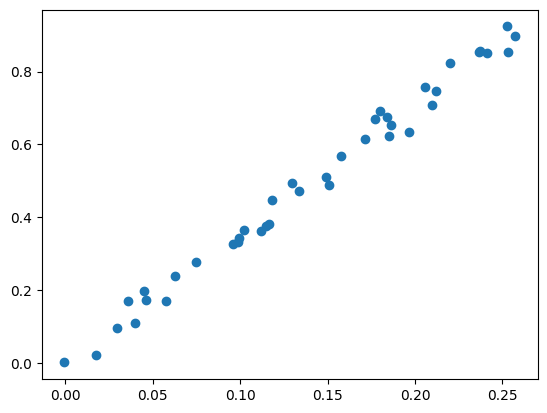

In [14]:
plt.scatter(mycebmf.F[:,0], v)

In [15]:
mycebmf.L[:,1]

array([ 1.54805767e-01, -1.19088786e-01, -1.44940011e-03, -1.25468511e-02,
        1.97038724e-01, -2.85199099e-04, -2.18016954e-02, -2.61710008e-02,
       -4.42559237e-03,  1.53083982e-02, -3.23677371e-02,  1.42017324e-01,
        2.23739850e-01,  2.05090938e-01,  1.62191868e-02,  6.11226483e-02,
        2.74112655e-01,  2.01059256e-01, -1.98392661e-01, -4.21384314e-01,
       -3.80706127e-02,  7.62749542e-02, -1.29508477e-01,  1.75024671e-01,
       -2.49857117e-01,  7.73555647e-02, -1.60676762e-01, -1.75934567e-01,
        8.21877648e-02, -7.76120613e-04, -8.17298859e-02, -6.29671172e-02,
        1.63199329e-01,  7.03210172e-02,  7.02249329e-02,  2.19737860e-01,
       -1.23479229e-01, -6.87179769e-02, -3.79787315e-01,  1.82166781e-02,
       -4.92131959e-02, -8.80067748e-02, -9.85389452e-03,  1.31412004e-02,
       -3.98324430e-02, -1.46891215e-01, -1.21545250e-01, -5.07468933e-02,
        5.14079750e-03,  6.62311492e-02])

In [16]:
for i in range(40):
    mycebmf.iter()

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  l

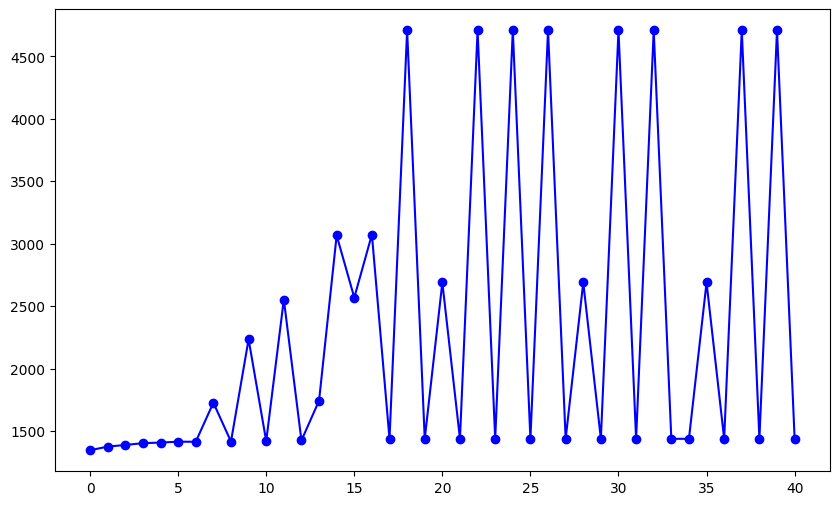

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

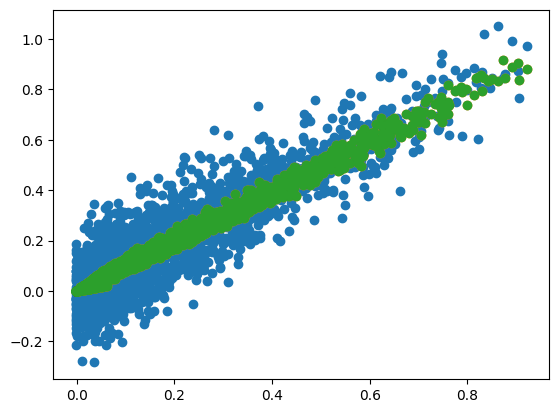

In [18]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [19]:
mycebmf.L
 

array([[0.52243395, 0.        , 0.        , 0.        , 0.        ],
       [0.21178165, 0.        , 0.        , 0.        , 0.        ],
       [0.58964797, 0.        , 0.        , 0.        , 0.        ],
       [1.2451685 , 0.        , 0.        , 0.        , 0.        ],
       [1.99255143, 0.        , 0.        , 0.        , 0.        ],
       [2.48748986, 0.        , 0.        , 0.        , 0.        ],
       [0.41319958, 0.        , 0.        , 0.        , 0.        ],
       [0.84534011, 0.        , 0.        , 0.        , 0.        ],
       [0.93807746, 0.        , 0.        , 0.        , 0.        ],
       [1.31070318, 0.        , 0.        , 0.        , 0.        ],
       [1.63176866, 0.        , 0.        , 0.        , 0.        ],
       [0.31172439, 0.        , 0.        , 0.        , 0.        ],
       [2.92988777, 0.        , 0.        , 0.        , 0.        ],
       [2.47601449, 0.        , 0.        , 0.        , 0.        ],
       [2.14238536, 0.        , 0.